## Assignment 5

In this assignment, you will be reproducing the models described in the examples from chapter three of Deep Learning with Python. You will use that code to create a workflow that trains the model, uses the model to perform model validation, and output model metrics.

### Assignment 5.1

Implement the movie review classifier found in section 3.4 of Deep Learning with Python.

In [1]:
# import required packages
import numpy as np
from keras.datasets import imdb
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
import matplotlib.pyplot as plt

In [2]:
# load data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17465344/17464789 [==============================] - 1s 0us/step


In [3]:
# create function to encode interger sequences into binary matrix
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [4]:
# apply function to train and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
# vectorize data labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
# create a validation set
partial_x_train = x_train[10000:]
x_val = x_train[:10000]
partial_y_train = y_train[10000:]
y_val = y_train[:10000]

In [7]:
# define neural network model
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [8]:
# compile the model
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['acc'])

In [9]:
# training the model
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 43ms/step - loss: 0.5724 - acc: 0.6861 - val_loss: 0.4438 - val_acc: 0.8477
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3491 - acc: 0.8929 - val_loss: 0.3230 - val_acc: 0.8868
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2387 - acc: 0.9264 - val_loss: 0.2836 - val_acc: 0.8907
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1885 - acc: 0.9407 - val_loss: 0.2870 - val_acc: 0.8855
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1498 - acc: 0.9537 - val_loss: 0.2855 - val_acc: 0.8865
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1235 - acc: 0.9628 - val_loss: 0.2928 - val_acc: 0.8868
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1022 - acc: 0.9699 - val_loss: 0.3625 - val_acc: 0.8674
Epoch 8/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0815 - a

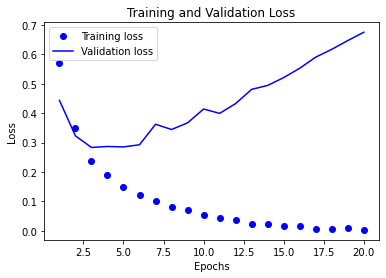

In [11]:
# visualizing training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

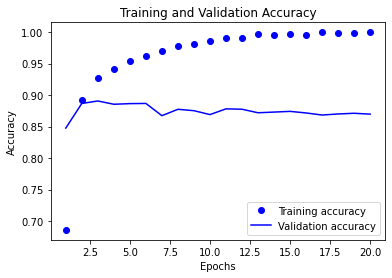

In [12]:
# visualizing training and validation accuracy
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [13]:
# evaluate the model
results = model.evaluate(x_test, y_test)

print(results)

782/782 [==============================] - 2s 2ms/step - loss: 0.7472 - acc: 0.8513
[0.7471513152122498, 0.8512799739837646]


In [14]:
# use model to make predictions
model.predict(x_test)

array([[3.7848055e-03],
       [9.9999523e-01],
       [9.9439192e-01],
       ...,
       [8.7636709e-04],
       [1.2678683e-02],
       [5.1174659e-01]], dtype=float32)

### Assignment 5.2

Implement the news classifier found in section 3.5 of Deep Learning with Python.

In [15]:
# load required packages
from keras.datasets import reuters
import copy

In [16]:
# load data
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2113536/2110848 [==============================] - 0s 0us/step


In [17]:
# apply encoding function to train and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [18]:
# define function to perform one-hot-encoding
def to_one_hot(labels, dimension = 46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [19]:
# apply one-hot-encoding to data
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [20]:
# create validation set
partial_x_train = x_train[1000:]
x_val = x_train[:1000]
partial_y_train = one_hot_train_labels[1000:]
y_val = one_hot_train_labels[:1000]

In [21]:
# define neural network model
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

In [22]:
# compile the model
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [23]:
# train the model
model.fit(partial_x_train,
         partial_y_train,
         epochs = 20,
         batch_size = 512,
         validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 0s 25ms/step - loss: 2.5615 - accuracy: 0.5420 - val_loss: 1.6548 - val_accuracy: 0.6610
Epoch 2/20
16/16 [==============================] - 0s 18ms/step - loss: 1.3702 - accuracy: 0.7215 - val_loss: 1.2577 - val_accuracy: 0.7310
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 1.0198 - accuracy: 0.7869 - val_loss: 1.1238 - val_accuracy: 0.7510
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 0.8082 - accuracy: 0.8272 - val_loss: 1.0159 - val_accuracy: 0.7910
Epoch 5/20
16/16 [==============================] - 0s 16ms/step - loss: 0.6419 - accuracy: 0.8611 - val_loss: 0.9821 - val_accuracy: 0.7970
Epoch 6/20
16/16 [==============================] - 0s 21ms/step - loss: 0.5173 - accuracy: 0.8939 - val_loss: 0.9347 - val_accuracy: 0.8030
Epoch 7/20
16/16 [==============================] - 0s 18ms/step - loss: 0.4149 - accuracy: 0.9186 - val_loss: 0.9110 - val_accuracy: 0.8160
Epoch 8/20
16

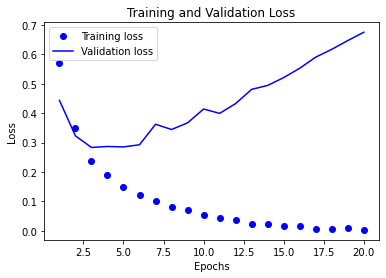

In [24]:
# visualizing training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

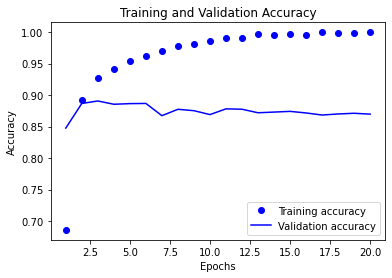

In [25]:
# visualizing training and validation accuracy
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [26]:
# evaluating the model
results = model.evaluate(x_test, one_hot_test_labels)

print(results)

71/71 [==============================] - 0s 2ms/step - loss: 1.2971 - accuracy: 0.7796
[1.2970781326293945, 0.7796081900596619]


In [29]:
#
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)/len(test_labels))

0.18788958147818344

In [30]:
# predict test results
predictions = model.predict(x_test)

print(predictions[0].shape)

print(np.sum(predictions[0]))

print(np.argmax(predictions[0]))

(46,)
1.0000002
3


In [32]:
# creating a model with information bottleneck, compiling and fitting
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(4, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(partial_x_train,
         partial_y_train,
         epochs = 20,
         batch_size = 128,
         validation_data = (x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 9ms/step - loss: 2.9010 - accuracy: 0.4118 - val_loss: 2.0794 - val_accuracy: 0.5760
Epoch 2/20
63/63 [==============================] - 0s 7ms/step - loss: 1.7169 - accuracy: 0.6299 - val_loss: 1.5568 - val_accuracy: 0.6200
Epoch 3/20
63/63 [==============================] - 0s 8ms/step - loss: 1.3441 - accuracy: 0.6649 - val_loss: 1.4070 - val_accuracy: 0.6530
Epoch 4/20
63/63 [==============================] - 0s 7ms/step - loss: 1.1517 - accuracy: 0.7090 - val_loss: 1.3240 - val_accuracy: 0.6970
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 1.0100 - accuracy: 0.7518 - val_loss: 1.3102 - val_accuracy: 0.6970
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 0.9108 - accuracy: 0.7745 - val_loss: 1.2897 - val_accuracy: 0.7050
Epoch 7/20
63/63 [==============================] - 0s 7ms/step - loss: 0.8330 - accuracy: 0.7861 - val_loss: 1.3058 - val_accuracy: 0.7090
Epoch 8/20
63/63 [==

In [33]:
# creating a model with larger layer, compiling and fitting
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(partial_x_train,
         partial_y_train,
         epochs = 20,
         batch_size = 512,
         validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 0s 22ms/step - loss: 2.5691 - accuracy: 0.5168 - val_loss: 1.6496 - val_accuracy: 0.6470
Epoch 2/20
16/16 [==============================] - 0s 19ms/step - loss: 1.3611 - accuracy: 0.7103 - val_loss: 1.2513 - val_accuracy: 0.7170
Epoch 3/20
16/16 [==============================] - 0s 18ms/step - loss: 1.0175 - accuracy: 0.7784 - val_loss: 1.0948 - val_accuracy: 0.7680
Epoch 4/20
16/16 [==============================] - 0s 19ms/step - loss: 0.7990 - accuracy: 0.8299 - val_loss: 0.9969 - val_accuracy: 0.7960
Epoch 5/20
16/16 [==============================] - 0s 17ms/step - loss: 0.6289 - accuracy: 0.8668 - val_loss: 0.9486 - val_accuracy: 0.8080
Epoch 6/20
16/16 [==============================] - 0s 19ms/step - loss: 0.4938 - accuracy: 0.8963 - val_loss: 0.9323 - val_accuracy: 0.8100
Epoch 7/20
16/16 [==============================] - 0s 18ms/step - loss: 0.3895 - accuracy: 0.9184 - val_loss: 0.8823 - val_accuracy: 0.8180
Epoch 8/20
16

In [34]:
# creating a model with additional layer, compiling and fitting
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(partial_x_train,
         partial_y_train,
         epochs = 20,
         batch_size = 512,
         validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 0s 20ms/step - loss: 2.5988 - accuracy: 0.5222 - val_loss: 1.6829 - val_accuracy: 0.6350
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 1.4128 - accuracy: 0.6946 - val_loss: 1.3143 - val_accuracy: 0.6950
Epoch 3/20
16/16 [==============================] - 0s 18ms/step - loss: 1.0851 - accuracy: 0.7557 - val_loss: 1.1615 - val_accuracy: 0.7410
Epoch 4/20
16/16 [==============================] - 0s 17ms/step - loss: 0.8676 - accuracy: 0.7974 - val_loss: 1.0613 - val_accuracy: 0.7620
Epoch 5/20
16/16 [==============================] - 0s 19ms/step - loss: 0.6939 - accuracy: 0.8398 - val_loss: 1.0290 - val_accuracy: 0.7790
Epoch 6/20
16/16 [==============================] - 0s 18ms/step - loss: 0.5557 - accuracy: 0.8732 - val_loss: 0.9944 - val_accuracy: 0.7820
Epoch 7/20
16/16 [==============================] - 0s 18ms/step - loss: 0.4434 - accuracy: 0.9032 - val_loss: 1.0224 - val_accuracy: 0.7870
Epoch 8/20
16

### Assignment 5.3

Implement the housing price regression model found in section 3.6 of Deep Learning with Python.

In [37]:
# loading required packages
from keras.datasets import boston_housing

In [44]:
# load data
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [45]:
# show data shapes
print(train_data.shape)
print(test_data.shape)

(404, 13)
(102, 13)


In [46]:
# normalize the data
mean = train_data.mean(axis = 0)
train_data -= mean
std = train_data.std(axis = 0)
train_data /= std

test_data -= mean
test_data /= std

In [51]:
# define neural network model function
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation = 'relu', input_shape = (train_data.shape[1], )))
    model.add(layers.Dense(64, activation = 'relu'))
    model.add(layers.Dense(1))

    # compile the model
    model.compile(optimizer = 'rmsprop',
                 loss = 'mse',
                 metrics = ['mae'])
    
    return model

In [52]:
# use k-fold validation with model function
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('Processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                        train_data[(i + 1) * num_val_samples:]],
                                        axis = 0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
                                            train_targets[(i + 1) * num_val_samples:]],
                                            axis = 0)
    
    # build model
    model = build_model()
    
    # fit model
    model.fit(partial_train_data,
             partial_train_targets,
             epochs = num_epochs,
             batch_size = 1,
             verbose = 0)
    
    # evaluate model on validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 0)
    all_scores.append(val_mae)

Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3


In [53]:
print(all_scores)

print(np.mean(all_scores))

[1.904146671295166, 2.663848876953125, 2.77786922454834, 2.311192274093628]
2.4142642617225647


In [59]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('Processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                        train_data[(i + 1) * num_val_samples:]],
                                        axis = 0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
                                            train_targets[(i + 1) * num_val_samples:]],
                                            axis = 0)
    
    # build model
    model = build_model()
    
    # fit model
    history = model.fit(partial_train_data,
                        partial_train_targets,
                        epochs = num_epochs,
                        batch_size = 1,
                        validation_data = (val_data, val_targets),
                        verbose = 0)
    
    # evaluate model on validation data
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3


In [61]:
# building history of successive mean k-fold validation scores
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

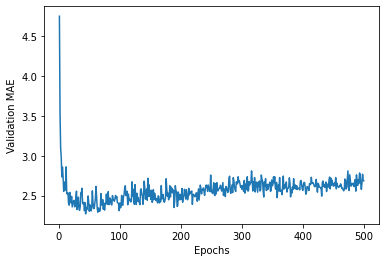

In [63]:
# visualizing validation scores
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

plt.show()

In [64]:
# visualizing without first 10 points
def smooth_curve(points, factor = 0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (i - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

In [65]:
# apply smoothing function
smooth_mae_history = smooth_curve(average_mae_history[10:])

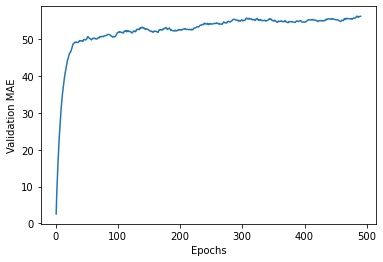

In [66]:
# visualize smoothed curve
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

plt.show()

In [67]:
# evaluate the model
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

print(test_mae_score)

4/4 [==============================] - 0s 1ms/step - loss: 18.4250 - mae: 3.0353
3.0353307723999023
